In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_circles, make_moons, make_blobs
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

In [2]:
datasets = [
    make_circles(1000, random_state=0, noise=0.05, factor=0.5),
    make_moons(1000, random_state=0, noise=0.05),
    make_blobs([500, 500], n_features=2, cluster_std=0.5, random_state=0)
]

In [3]:
def plot_boundaries(clf, xb, yb, n=100):
    xx, yy = np.meshgrid(np.linspace(*xb, n),
                         np.linspace(*yb, n))
    z = clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.RdBu, alpha=0.3)

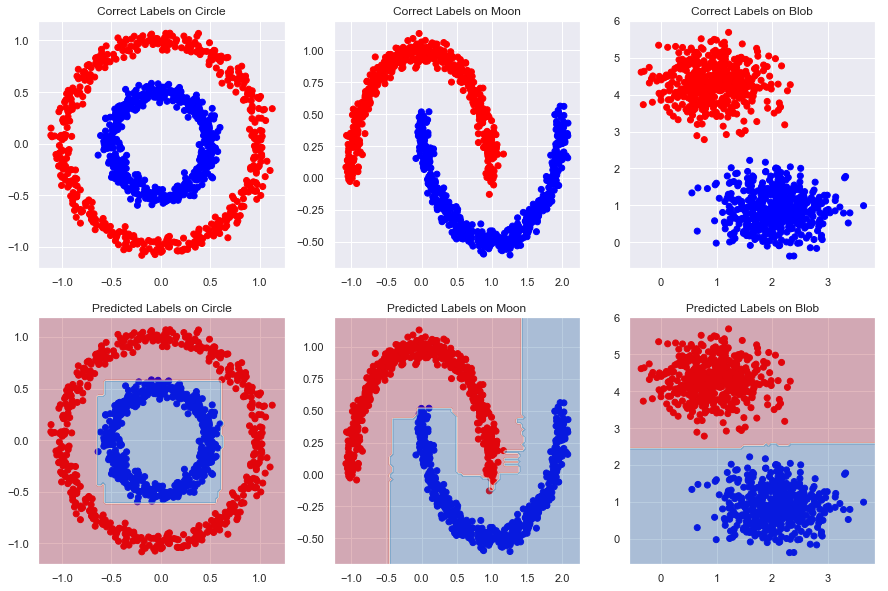

In [4]:
cm = ListedColormap(['#FF0000', '#0000FF'])
names = ['Circle', 'Moon', 'Blob']

plt.figure(figsize=(15, 10))
for idx, (ds, name) in enumerate(zip(datasets, names), 1):
    X, y = ds
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X, y)
    pred = clf.predict(X)
    plt.subplot(2, 3, idx)
    plt.title(f'Correct Labels on {name}')
    plt.scatter(*X.T, c=y, cmap=cm)
    plt.subplot(2, 3, idx+3)
    plt.title(f'Predicted Labels on {name}')
    plt.scatter(*X.T, c=pred, cmap=cm)
    plot_boundaries(clf, plt.xlim(), plt.ylim())
plt.show()